In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
def unit_step_func(x):
  return np.where(x>0,1,0)

In [5]:
class Perceptron :

  def __init__(self, learning_rate=0.01, epochs=1000):
    self.lr = learning_rate
    self.epochs= epochs
    self.activation_func = unit_step_func
    self.w = None
    self.b = None

  def fit(self, x, y):
      rows, columns = x.shape

      self.w = np.zeros(columns)
      self.b = 0

      y =np.where(y>0,1,0)
# learn weights

      for _ in range(self.epochs):
        for idx, x_i in enumerate(x):
          l_output = np.dot(x_i, self.w)+self.b
          y_pred= self.activation_func(l_output)

# preceptron update

          update = self.lr*(y[idx] - y_pred)
          self.w+=update *x_i
          self.b+=update


  def predict(self, x):
      l_output = np.dot(x, self.w)+self.b
      y_pred= self.activation_func(l_output)
      return y_pred


## Testing

In [7]:
if __name__ == "__main__":

  def accuracy(y_test, y_pred):
    accuracy= np.sum(y_test == y_pred)/len(y_test)
    return accuracy

In [10]:
x,y = datasets.make_blobs(n_samples=150,
                          n_features=2,
                          centers=2,
                          cluster_std=1.05,
                          random_state=42)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [13]:
p= Perceptron(learning_rate= 0.01, epochs=1000)
p.fit(x_train, y_train)

predict= p.predict(x_test)

In [16]:
print(y_test, predict)

[0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1] [0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1]


In [15]:
print(accuracy(y_test, predict))

1.0


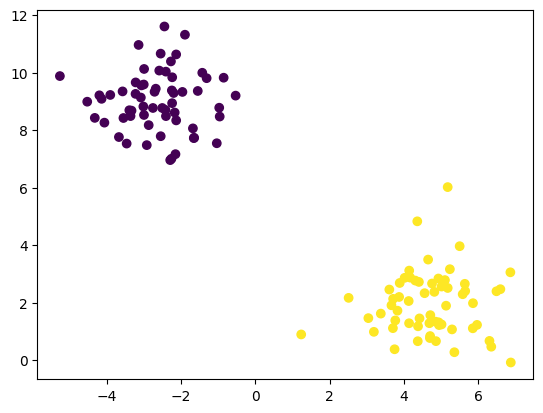

In [19]:
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(x_train[:,0],
            x_train[:,1],
            marker="o",
            c=y_train)

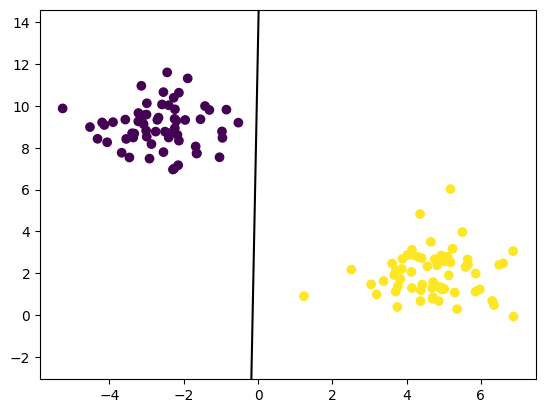

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(x_train[:, 0])
x0_2 = np.amax(x_train[:, 0])

x1_1 = (-p.w[0] * x0_1 - p.b) / p.w[1]
x1_2 = (-p.w[0] * x0_2 - p.b) / p.w[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(x_train[:, 1])
ymax = np.amax(x_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()